In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
# importing used libraries

In [92]:
df=pd.read_csv("bank_data.csv")
#reading file

In [93]:
df.head(10)
# view first 10 rows to get a feel of data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male
5,731,548,520.710,Level 0 Recovery,35,Male
6,221,549,221.585,Level 0 Recovery,33,Male
7,1932,560,373.720,Level 0 Recovery,19,Female
8,1828,562,201.865,Level 0 Recovery,22,Female
9,2001,565,504.885,Level 0 Recovery,27,Male


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [95]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [96]:
df.drop('id', inplace=True, axis='columns')

In [97]:
# def calculate_discontinuity(expected_recovery_amount, actual_recovery_amount):
#     discontinuity = []
#     for i in range(len(expected_recovery_amount)):
#         if actual_recovery_amount[i] >= expected_recovery_amount[i] + 50:
#             discontinuity.append(1)
#         else:
#             discontinuity.append(0)
#     return discontinuity


In [98]:
# discontinuity=calculate_discontinuity(df['expected_recovery_amount'], df['actual_recovery_amount'])

In [99]:
# df['discontinuity'] = discontinuity

-Graphical exploratory data analysis

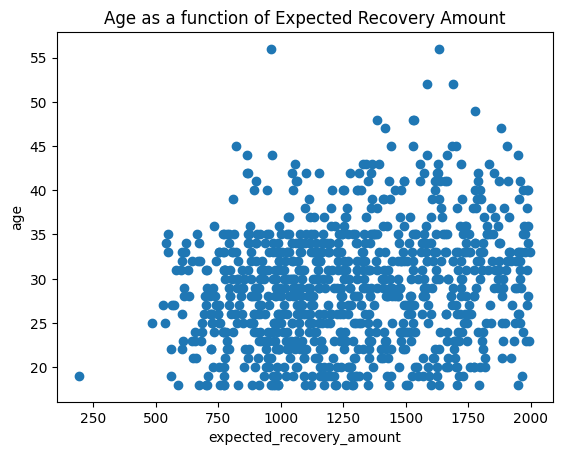

In [100]:
# Filter the DataFrame to include only the rows with Expected Recovery Amount from $0 to $2000
df_filtered = df[(df['expected_recovery_amount'] >= 0) & (df['expected_recovery_amount'] <= 2000)]

# Create a scatter plot of age as a function of Expected Recovery Amount
plt.scatter(df_filtered['expected_recovery_amount'], df_filtered['age'])

# Set the x and y-axis labels
plt.xlabel('expected_recovery_amount')
plt.ylabel('age')

# Set the title of the plot
plt.title('Age as a function of Expected Recovery Amount')

# Show the plot
plt.show()

- The age does not show a discontinuity for amount 1000$ only outliers

- Statistical test: age vs. expected recovery amount

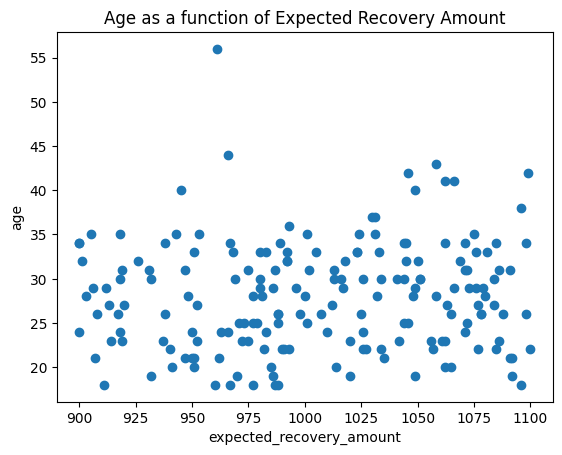

In [101]:
# Filter the DataFrame to include only the rows with Expected Recovery Amount from $0 to $2000
df_filtered = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Create a scatter plot of age as a function of Expected Recovery Amount
plt.scatter(df_filtered['expected_recovery_amount'], df_filtered['age'])

# Set the x and y-axis labels
plt.xlabel('expected_recovery_amount')
plt.ylabel('age')

# Set the title of the plot
plt.title('Age as a function of Expected Recovery Amount')

# Show the plot
plt.show()

- this also shows no obvious discontinuities

-Statistical test: sex vs. expected recovery amount

In [102]:

# Filter the DataFrame to include only the rows with Expected Recovery Amount from $900 to $1100
df_filtered = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Calculate the percentage of male customers in the filtered DataFrame
male_percentage = df_filtered[df_filtered['sex'] == 'Male'].shape[0] / df_filtered.shape[0] * 100

# Print the percentage of male customers
print('Percentage of male customers:', male_percentage)

Percentage of male customers: 60.86956521739131


In [103]:
# Filter the DataFrame to include only the rows with Expected Recovery Amount from $900 to $1100
df_filtered = df[(df['expected_recovery_amount'] >= 1000) & (df['expected_recovery_amount'] <= 2000)]

# Calculate the percentage of male customers in the filtered DataFrame
male_percentage = df_filtered[df_filtered['sex'] == 'Male'].shape[0] / df_filtered.shape[0] * 100

# Print the percentage of male customers
print('Percentage of male customers:', male_percentage)

Percentage of male customers: 52.90611028315947


- Exploratory graphical analysis: recovery amount

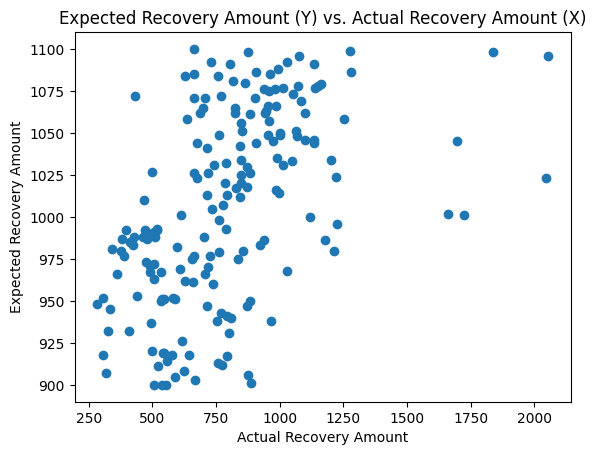

In [104]:
df_filtered = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Create a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X)
plt.scatter(df_filtered['actual_recovery_amount'], df_filtered['expected_recovery_amount'])

# Set the x and y-axis labels
plt.xlabel('Actual Recovery Amount')
plt.ylabel('Expected Recovery Amount')

# Set the title of the plot
plt.title('Expected Recovery Amount (Y) vs. Actual Recovery Amount (X)')

# Show the plot
plt.show()

Theres a slight discontinuity between 1000  & 1100

- Statistical analysis: recovery amount

In [105]:

from scipy.stats import kruskal

# Filter the data between $900 and $1100
data_filtered = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]

# Group the data by any categorical variable, if applicable
groups = data_filtered.groupby('actual_recovery_amount')['expected_recovery_amount'].apply(list)

# Perform the Kruskal-Wallis test
statistic, pvalue = kruskal(*groups)

# Print the results
print("Kruskal-Wallis test statistic:", statistic)
print("p-value:", pvalue)

Kruskal-Wallis test statistic: 183.0
p-value: 0.48609714517719294


In [106]:
from scipy.stats import kruskal


data_filtered = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Group the data by any categorical variable, if applicable
groups = data_filtered.groupby('actual_recovery_amount')['expected_recovery_amount'].apply(list)

# Perform the Kruskal-Wallis test
statistic, pvalue = kruskal(*groups)

# Print the results
print("Kruskal-Wallis test statistic:", statistic)
print("p-value:", pvalue)

Kruskal-Wallis test statistic: 99.0
p-value: 0.4810969124082639


- since the window (950 to 1050) had smaller value of 99 than the other window(900 to 1100) 183 therefore there's a discontinuity

In [108]:
# df['sex'] = df['sex'].map({'Male':0,'Female':1}).astype(int)
# df['recovery_strategy'] = df['recovery_strategy'].map({'Level 0 Recovery':0,'Level 1 Recovery':1,'Level 2 Recovery':2,'Level 3 Recovery':3,'Level 4 Recovery':4}).astype(int)

In [115]:
df_filtered = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]

In [116]:
import statsmodels.api as sm

# Define X and y
X = df_filtered['expected_recovery_amount']
y = df_filtered['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the model summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           1.56e-13
Time:                            06:48:18   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
df_filtered = df.loc[(df['expected_recovery_amount']<1100) &
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = df_filtered[['expected_recovery_amount','indicator_1000']]
y = df_filtered['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           1.83e-15
Time:                            06:50:00   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
#Changin the window
df_filtered = df.loc[(df['expected_recovery_amount']<1050) &
                      (df['expected_recovery_amount']>=950)]

# Define X and y
X = df_filtered[['expected_recovery_amount','indicator_1000']]
y = df_filtered['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           1.12e-07
Time:                            06:52:16   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion : The incremental recovery amount at the higher recovery approach is significantly bigger than the 50 dollars per customer it costs for the higher recovery strategy, regardless of whether we select a wide (900 to 1100) or narrower window (950 to 1050). We therefore come to the conclusion that the higher recovery technique is worth the $50 per customer premium.